In [5]:
###  This file has the updated API calls with descriptions.
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append("../../")
sys.path.append("../")
plt.rcParams["figure.figsize"] = [12, 7]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Parse through the file, and create a pandas DataFrame database style table to hold all event information

> The gc_event_dataframe is a pandas DataFrame, with the following columns
> ### "DateTime" -> Real world time of gc event
> ### "TimeFromStart_seconds" -> time of beginning of event in seconds
> ### "EventType" -> Either concurrent or stop the world pause
> ### "EventName" -> Specific action from the event. Example : "(pause) Young"
> ### "AdditionalEventInfo" -> Information about the event
> ### "MemoryChange_MB" -> Memory changed, following this patten: before->after(max_heapsize)
> ### "Duration_miliseconds" -> How long it took for the event to occur in miliseconds


In [86]:
files = ["../../datasets/short/ZGC_short.log"]
from src.compare_logs import get_parsed_comparions_from_files 
gc_event_dataframes = get_parsed_comparions_from_files(files)


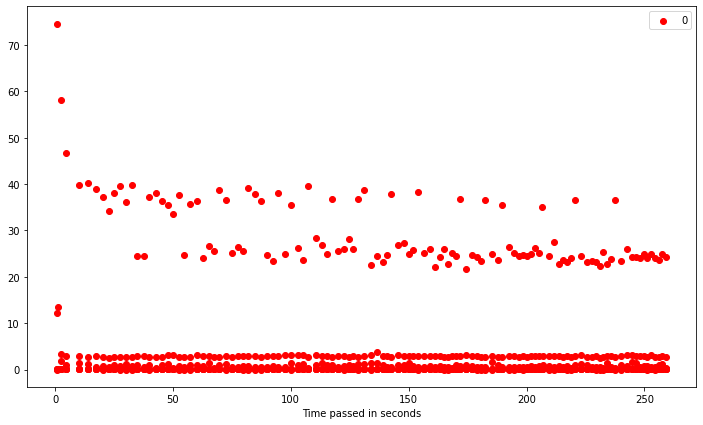

In [109]:
import new_graphing 
#new_graphing.scatter(gc_event_dataframes, group_by = "EventName")

# graph = new_graphing.scatter(gc_event_dataframes,
#                          group_by = "EventName", 
#                          filter_by = [("EventType" , "Pause")],
#                          labels=  ["ZGC"])


_ = new_graphing.scatter(gc_event_dataframes,
                         group_by = None, filter_by = [("HeapBeforeGC", None)])



In [95]:
r = [("1", "2"), ("3", "a")]
for a, b in r:
    print(a)
    print(b)

1
2
3
a


### Plot the concurrent and stop the world periods


### Print trends about the events based on Event Type and Name

In [5]:
from src.plot import plot 
plot(gc_event_dataframes, group_by = "EventName", filter_by = [("EventType", "Pause")])
plot(gc_event_dataframes, group_by = "EventName", filter_by = [("EventType", "Concurrent")])

NameError: name 'plot' is not defined

### Compare percentiles for pauses/concurrent phases, general and specific


In [ ]:
from src.percentiles import compare_percentiles
compare_percentiles(gc_event_dataframes, group_by = None ,       filter_by = ("EventType", "Pause"))
compare_percentiles(gc_event_dataframes, group_by = "EventName", filter_by = ("EventType", "Pause"))
compare_percentiles(gc_event_dataframes, group_by = "EventName", filter_by = ("EventType", "Concurrent"))

### Average time in seconds per phase  / grouping

In [ ]:
from src.trends import compare_trends
compare_percentiles(gc_event_dataframes, group_by = None ,       filter_by = ("EventType", "Pause"))
compare_percentiles(gc_event_dataframes, group_by = "EventName", filter_by = ("EventType", "Pause"))
compare_percentiles(gc_event_dataframes, group_by = "EventName", filter_by = ("EventType", "Concurrent"))


### Show latency heatmap


In [ ]:
show_heatmap(gc_event_dataframes, group_by = None, filter_by = ("EventType", "Pause"))

### Allocation over time

In [ ]:
plot_line(gc_event_dataframes, group_by = None, filter_by = ("EventType", "Pause"), column = "MemoryChange_MB")

### Frequencies of STW pauses (X ms buckets)